# Section3：出力層

## 出力層の役割

#### 中間層
- 中間層の出力が、次の層の入力となる

#### 出力層
- 人間が欲しい情報を出力すること。

## 誤差関数

#### 訓練データサンプルあたりの誤差
- 二乗誤差
\begin{aligned}
E_n(w) = \frac{1}{2} \sum_{i=1}^I (y_n-d_n)^2
\end{aligned}

- 交差エントロピー
\begin{aligned}
E_n(w) = - \sum_{i=1}^I \log{y_i}
\end{aligned}

## 出力層の活性化関数

#### 出力層の中間層との違い
【値の強弱】
- 中間層︓しきい値の前後で信号の強弱を調整
- 出力層︓信号の大きさ（比率）はそのままに変換 

【確率出力】
- 分類問題の場合、出力層の出力は0～1 の範囲に限定し、総和を１とする必要がある

⇒出力層と中間層で利用される活性化関数が異なる

#### 出力層の種類
| | 回帰 | 二値分類 | 多クラス分類 |
| :--- |  :--- |  :--- |  :--- |
|活性化関数 | 恒等写像 | シグモイド関数 | ソフトマックス関数 |
| 誤差関数 | 二乗誤差 | 交差エントロピー | 交差エントロピー |

#### 活性化関数の種類
中間層用の活性化関数
- ReLU関数
- シグモイド（ロジスティック）関数
- ステップ関数

出力層用の活性化関数
- 恒等写像　：　回帰 \
\begin{aligned}
f(u) = u
\end{aligned}


- シグモイド関数（ロジスティック関数)　：　二値分類
\begin{aligned}
f(u) = \frac{1}{1+e^{-u}}
\end{aligned}


- ソフトマックス関数　：多クラス分類
\begin{aligned}
f(i , u) = \frac{e^{u_i}}{\sum_{k=1}^K e^{u_K}}
\end{aligned}

## 確認テスト

#### P38　二乗誤差

問）なぜ、引き算でなく二乗するか述べよ

答）引き算を行うだけでは、各ラベルの誤差で正負両方の値が発生し、全体の誤差を正しくあらわすのに都合が悪い。２乗してそれぞれのラベルでの誤差を生の値になるようにする。

問）下式の1/2はどういう意味を持つか述べよ

答）
実際にネットワークを学習するときに行う、誤差逆伝搬の計算で、誤差関数の微分を用いるが、その際の計算式を簡単にするため。本質的な意味はない。

#### P45　ソフトマックス関数

問）①～③の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。

\begin{aligned}
f(i , u) = \frac{e^{u_i}}{\sum_{k=1}^K e^{u_K}}
\end{aligned}

答）下記のソースの中に、「####」で始まるコメントにて回答します。

In [2]:
# ソフトマックス関数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        ####  ②答え： np.exp(x)
        ####  ③答え： np.sum(np.exp(x), axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        ####  ①答え： y.T
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    ####  ②答え： np.exp(x)
    ####  ③答え： np.sum(np.exp(x))
    ####  ①答え： np.exp(x) / np.sum(np.exp(x))
    return np.exp(x) / np.sum(np.exp(x))

#### P47　交差エントロピー

問）①～②の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。

\begin{aligned}
E_n(w) = - \sum_{i=1}^I \log{y_i}
\end{aligned}

答）下記のソースの中に、「####」で始まるコメントにて回答します。

In [3]:
# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    ####  ①答え： -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size
    ####  ②答え： -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7))
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size


# Section4：勾配降下法

## 勾配降下法の目的

- 学習を通して誤差を最小にするネットワークを作成すること \
　⇒誤差$E(w)$を最小化するパラメータ$w$を発見すること
 
 

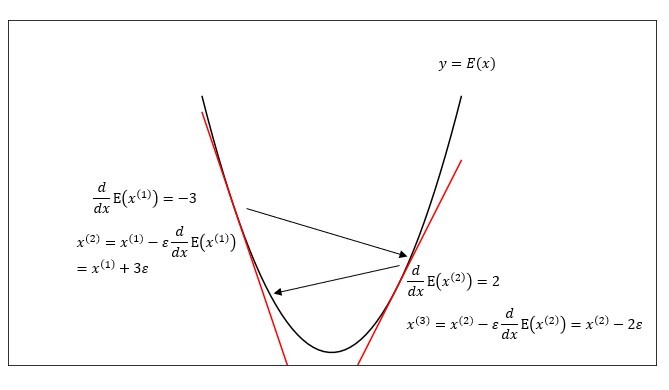

In [72]:
from IPython.display import Image
Image("./Section4_勾配降下法1.jpg")

$\varepsilon$ :学習率 \
学習率の値によって学習の効率が大きく異なる。 \
学習率が大きすぎた場合、最小値にいつまでもたどりつかず発散してしまう。 \
学習率が小さすぎる場合、発散することはないが、収束するまでに時間がかかってしまう。

#### 勾配降下法のアルゴリズム
- Momentum
- AdaGrad
- Adadelta
- Adam

#### 確率的勾配降下法（SGD)
- メリット 
 - データが冗⻑な場合の計算コストの軽減
 - 望まない局所極小解に収束するリスクの軽減
 - オンライン学習ができる

#### ミニバッチ勾配降下法
- メリット
 - 確率的勾配降下法のメリットを損なわず、計算機の計算資源を有効利用できる \
　⇒→CPUを利用したスレッド並列化やGPUを利用したSIMD並列化

#### 誤差勾配の計算
\begin{aligned}
\nabla =  \frac{\partial E}{\partial w} = \left[ \frac{\partial E}{\partial w_1} \ldots \frac{\partial E}{\partial w_M}  \right] \\
\end{aligned}
どう計算するか？ \
【数値微分】 \
プログラムで微小な数値を生成し擬似的に微分を計算する一般的な手法 \
\begin{aligned}
\frac{\partial E}{\partial w_m} \approx \frac{E(w_m + h) - E(w_m-h)}{2h}
\end{aligned}

数値微分のデメリット
- 各パラメータ$w_m$それぞれについて$E(w_m+h)$や$E(w_m-h)$を計算するために、順伝播の計算を繰り返し行う必要があり負荷が大きい \
　⇒誤差逆伝播法を利用する

# 確認テスト

#### P50　勾配降下法

問）該当するソースコードを探してみよう。
\begin{aligned}
w^{(t+1)} = w^{(t)} - \varepsilon \nabla E
\end{aligned}

答）\
network[key]  -= learning_rate* grad[key]

問）該当するソースコードを探してみよう。
\begin{aligned}
\nabla =  \frac{\partial E}{\partial w} = \left[ \frac{\partial E}{\partial w_1} \ldots \frac{\partial E}{\partial w_M}  \right] \\
\end{aligned}

答）\
grad = backward(x, d, z1, y)

#### P59 

問）確率的勾配降下法のオンライン学習とは何か、２行でまとめよ

#### P60

問）この数式の意味を図に書いて説明せよ。
\begin{aligned}
w^{(t+1)} = w^{(t)} - \varepsilon \nabla E_t  
\end{aligned}
